In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
with open("medianBluredSample.npy", "br") as f:
    medianBlur = np.load(f)

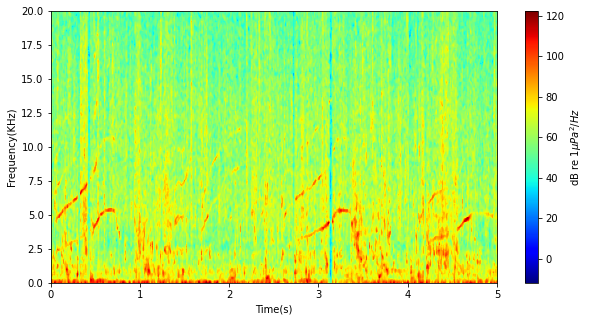

In [3]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(medianBlur.T, cmap='jet',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, 0, fs//2/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
c_bar.set_label("dB re 1" + r'$\mu Pa^{2}/Hz$')
plt.show()

In [13]:
frequency_width = 300
threshold = 3


fs = 96000
fft_number = 1024

f = np.arange(1024/2+1)*fs/1024

df = fs/fft_number

start_fre = 2000
end_fre = 10000

start_index = math.floor((start_fre)/df)
end_index = math.ceil((end_fre)/df)
width_size = math.ceil(frequency_width/2/df)

In [14]:
print("start index: {}".format(start_index))
print("end index: {}".format(end_index))
print("width size : {}".format(width_size))

start index: 21
end index: 107
width size : 2


In [17]:
SNR_max = []
SNR_min = []
SNR_mean = []
SNR = []
for i in range(len(medianBlur)):
    first_row = medianBlur[i,:]
    p2 = first_row[start_index-width_size:end_index-width_size]
    p1 = first_row[start_index:end_index]
    p3 = first_row[start_index+width_size:end_index+width_size]
    snr = 2*p1-(p2+p3)
    SNR.append(snr)
    SNR_max.append(snr.max())
    SNR_min.append(snr.min())
    SNR_mean.append(snr.mean())
SNR = np.array(SNR)  
SNR_max = np.array(SNR_max)
SNR_min = np.array(SNR_min)
SNR_mean = np.array(SNR_mean)

In [18]:
SNR.shape

(936, 86)

In [20]:
medianBlur_cut = medianBlur[:,start_index:end_index]
medianBlur_cut.shape

(936, 86)

In [29]:
(SNR>10)*(medianBlur_cut>80)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

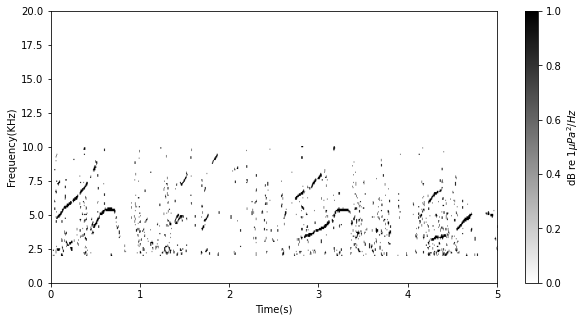

In [32]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(((SNR>10)*(medianBlur_cut>80)).T, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
c_bar.set_label("dB re 1" + r'$\mu Pa^{2}/Hz$')
plt.show()

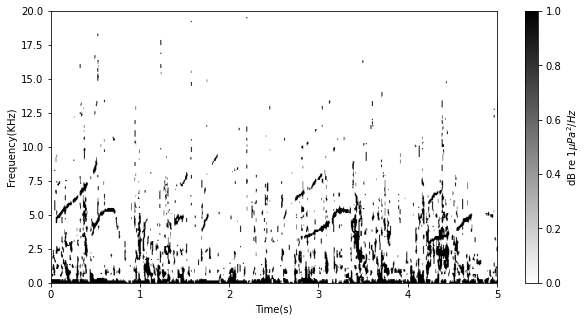

In [11]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(medianBlur.T>80, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, 0, fs//2/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
c_bar.set_label("dB re 1" + r'$\mu Pa^{2}/Hz$')
plt.show()

In [13]:
SNR_max.mean()

31.70198

In [8]:
SNR_max = []
SNR_min = []
SNR_mean = []
for i in range(len(medianBlur)):
    first_row = medianBlur[i,:]
    p1 = first_row[start_index:end_index]
    median_p1 = []
    for j in range(end_index-start_index):
        median = np.median(first_row[start_index+j-frequency_width:end_index+j+frequency_width])
        median_p1.append(median)
    median_p1 = np.array(median_p1)
    
    SNR = 10*np.log10(p1/median_p1)
    SNR_max.append(SNR.max())
    SNR_min.append(SNR.min())
    SNR_mean.append(SNR.mean())
    
SNR_max = np.array(SNR_max)
SNR_min = np.array(SNR_min)
SNR_mean = np.array(SNR_mean)

In [9]:
SNR_max.mean()

3.0316987

In [6]:
truefalsematrix = []
for i in range(len(medianBlur)):
    first_row = medianBlur[i,:]
    p1 = first_row[start_index:end_index]
    median_p1 = []
    for j in range(end_index-start_index):
        median = np.median(first_row[start_index+j-frequency_width:end_index+j+frequency_width])
        median_p1.append(median)
    median_p1 = np.array(median_p1)
    SNR = 10*np.log10(p1/median_p1)
    truefalsematrix.append(SNR>3)
truefalsematrix = np.array(truefalsematrix)

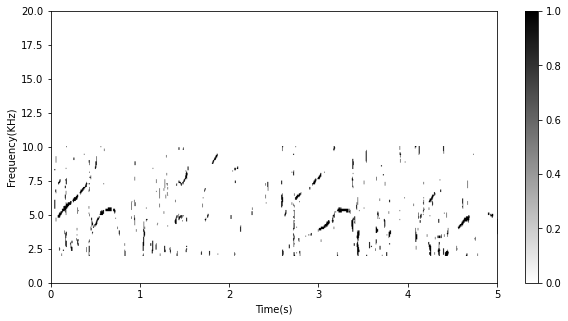

In [7]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(truefalsematrix.T, cmap="binary", origin='lower', aspect='auto',
               interpolation=None, extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

In [124]:
np.save("binarymatrix", truefalsematrix)